In [4]:
import numpy as np 
import pandas as pd 
import os
# import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers



In [5]:
batch_size = 40
img_height = 200
img_width = 200


In [6]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [7]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [8]:
class_names = training_ds.class_names

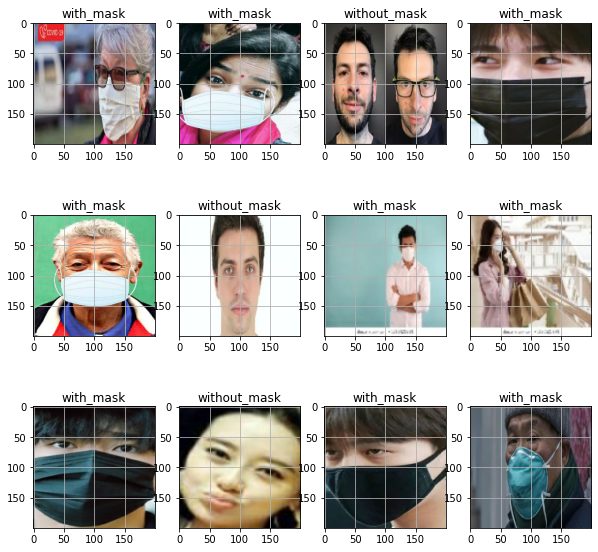

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [10]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  # Some thing I realised just
  # using flatten layer will 
  # increase the size of your
  # model, hence use
  # Global avg Pooling 
  # instead
  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])

In [12]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
## lets train our CNN
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 15)
MyCnn.save('./model')

Epoch 1/15
152/152 [==============================] - 20s 57ms/step - loss: 0.5838 - accuracy: 0.6881 - val_loss: 0.5156 - val_accuracy: 0.7424
INFO:tensorflow:Assets written to: model2-001.model\assets
Epoch 2/15
152/152 [==============================] - 7s 42ms/step - loss: 0.5329 - accuracy: 0.7372 - val_loss: 0.5089 - val_accuracy: 0.7523
INFO:tensorflow:Assets written to: model2-002.model\assets
Epoch 3/15
152/152 [==============================] - 6s 41ms/step - loss: 0.5193 - accuracy: 0.7473 - val_loss: 0.4815 - val_accuracy: 0.7709
INFO:tensorflow:Assets written to: model2-003.model\assets
Epoch 4/15
152/152 [==============================] - 6s 40ms/step - loss: 0.4881 - accuracy: 0.7630 - val_loss: 0.4236 - val_accuracy: 0.8000
INFO:tensorflow:Assets written to: model2-004.model\assets
Epoch 5/15
152/152 [==============================] - 6s 40ms/step - loss: 0.4327 - accuracy: 0.8062 - val_loss: 0.3582 - val_accuracy: 0.8424
INFO:tensorflow:Assets written to: model2-005.mo

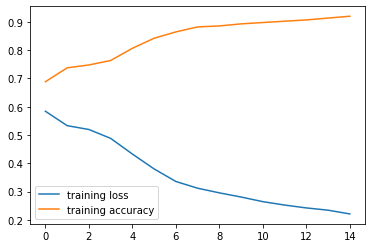

In [14]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

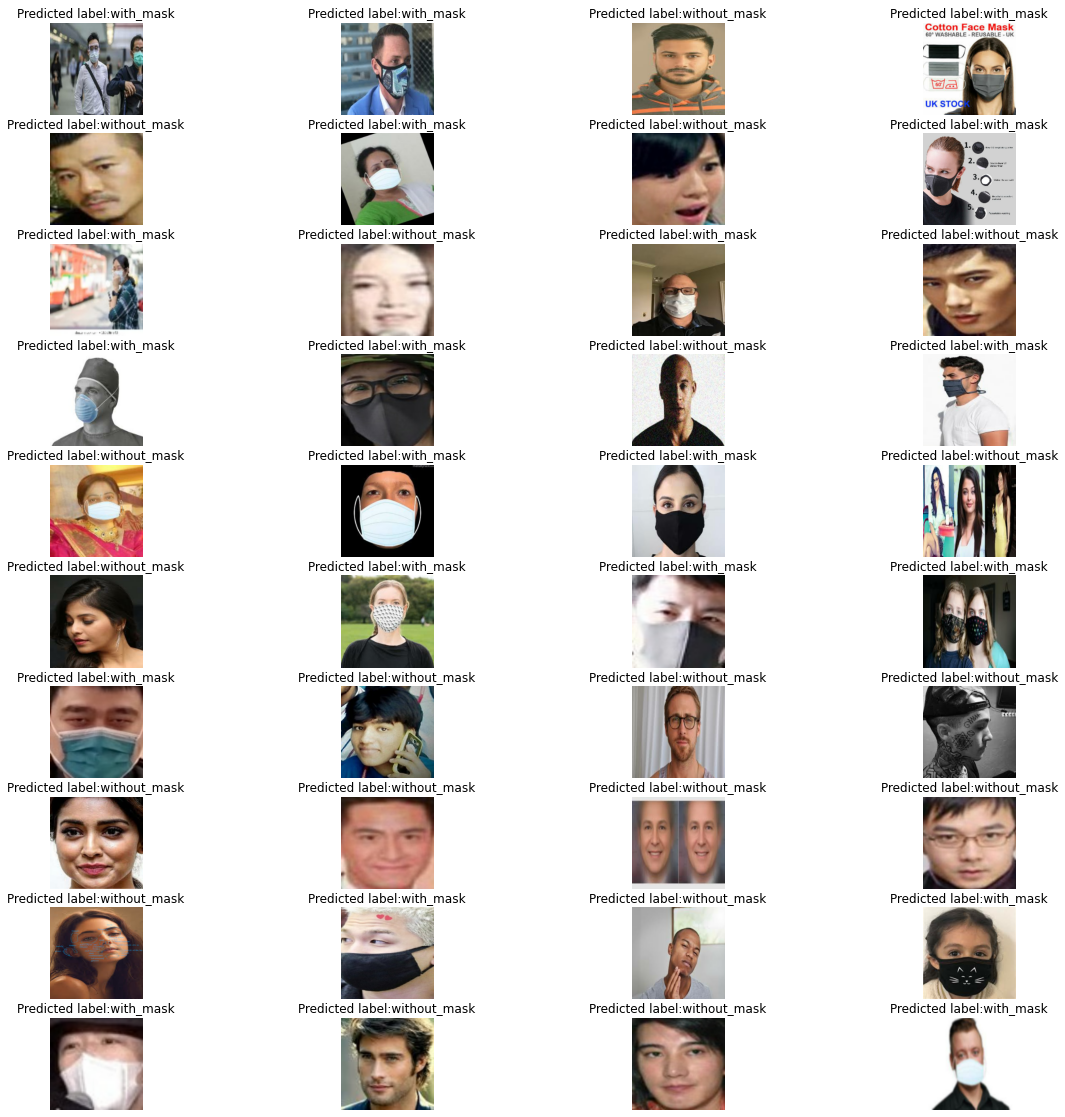

In [18]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)
    